In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [12]:
data_dir  = '/home/mgricci/data/phase2vec/classical_noise_type_gaussian_mag_0.42105263157894735'
data_fn   = os.path.join(data_dir, 'X_train.npy')
labels_fn = os.path.join(data_dir, 'y_train.npy')
pars_fn = os.path.join(data_dir, 'p_train.npy')

data   = np.load(data_fn)
labels = np.load(labels_fn)
pars = np.load(pars_fn)

num_data = data.shape[0]
num_vis = 16
vis_inds = np.random.permutation(num_data)[:num_vis]

vis_data = [data[ind] for ind in vis_inds]
vis_labels = [labels[ind] for ind in vis_inds]
vis_pars = [pars[ind] for ind in vis_inds]

/tmp/ipykernel_11932/1803372196.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=None)


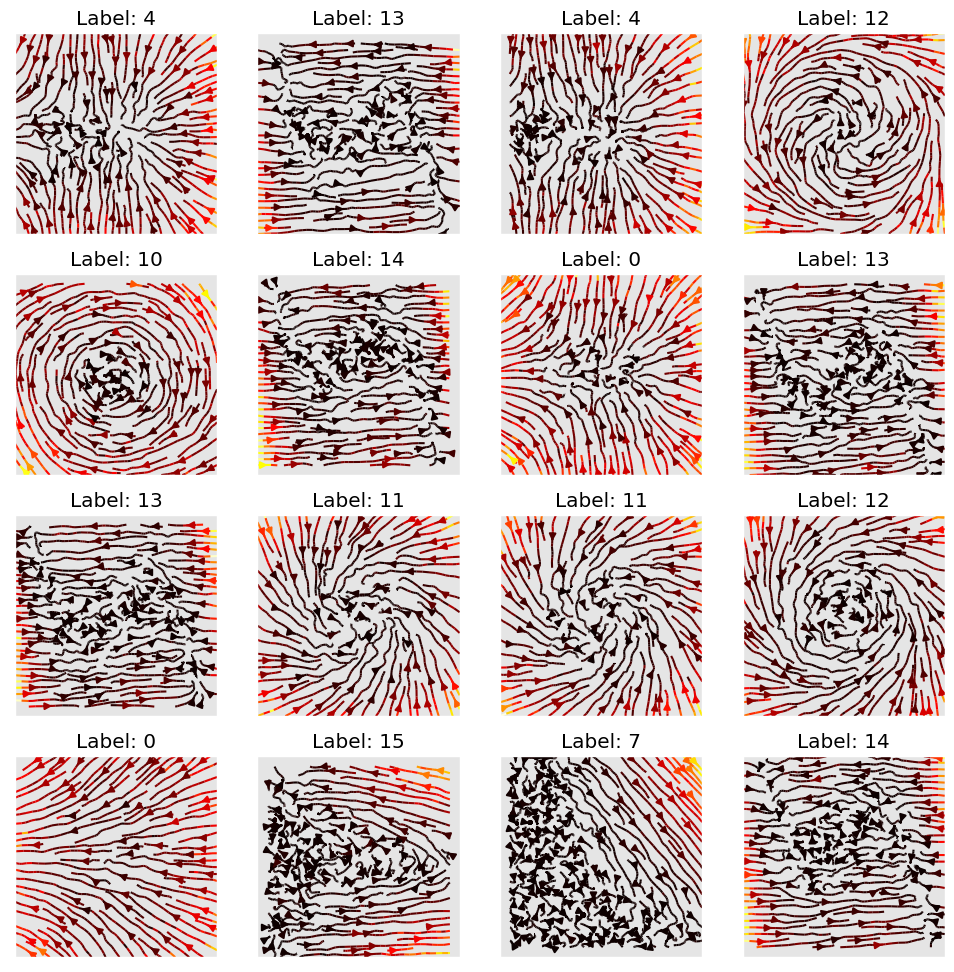

In [13]:
fig, axes = plt.subplots(4,4,figsize=(12,12))

x = np.linspace(-1.0,1.0,64)
y = np.linspace(-1.0,1.0,64)
for datum, label, par, ax in zip(vis_data, vis_labels, vis_pars, axes.reshape(-1)):
    datum = datum.transpose(0,2,1)
    ax.streamplot(x,y,datum[0],datum[1],color=(datum**2).sum(0), cmap='hot')
    ax.set_title(f'Label: {label}')
    ax.grid(b=None)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
plt.close()

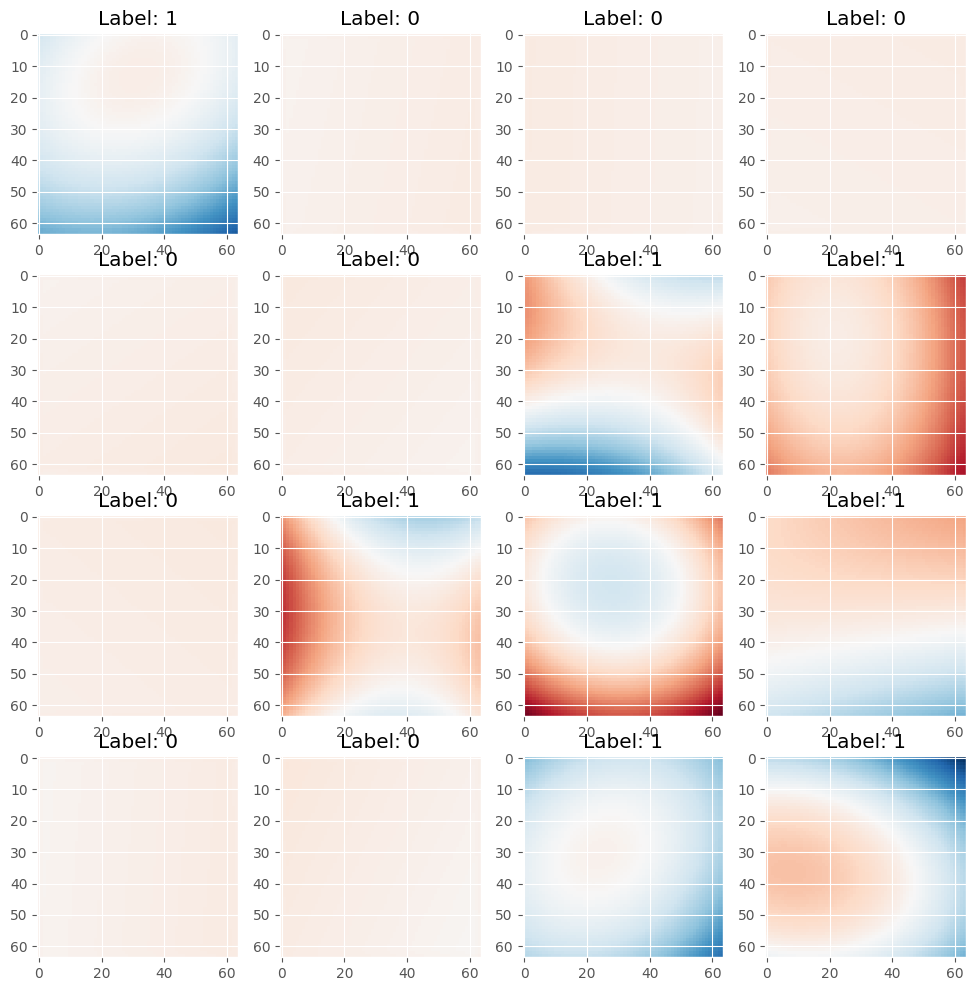

In [12]:
import torch
from src.data._utils import divergence, laplacian, jacobian, curl

fig, axes = plt.subplots(4,4,figsize=(12,12))

Ds = divergence(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
vmin = Ds.min()
vmax = Ds.max()
for datum, label, ax in zip(Ds, vis_labels, axes.reshape(-1)):
    ax.imshow(datum,cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()

tensor(1.5559, dtype=torch.float64)
tensor(1.9249e-11, dtype=torch.float64)
tensor(-8.5267e-14, dtype=torch.float64)
tensor(-1.7636e-11, dtype=torch.float64)
tensor(1.3263e-12, dtype=torch.float64)
tensor(-9.8054e-13, dtype=torch.float64)
tensor(0.8121, dtype=torch.float64)
tensor(0.2514, dtype=torch.float64)
tensor(6.5844e-13, dtype=torch.float64)


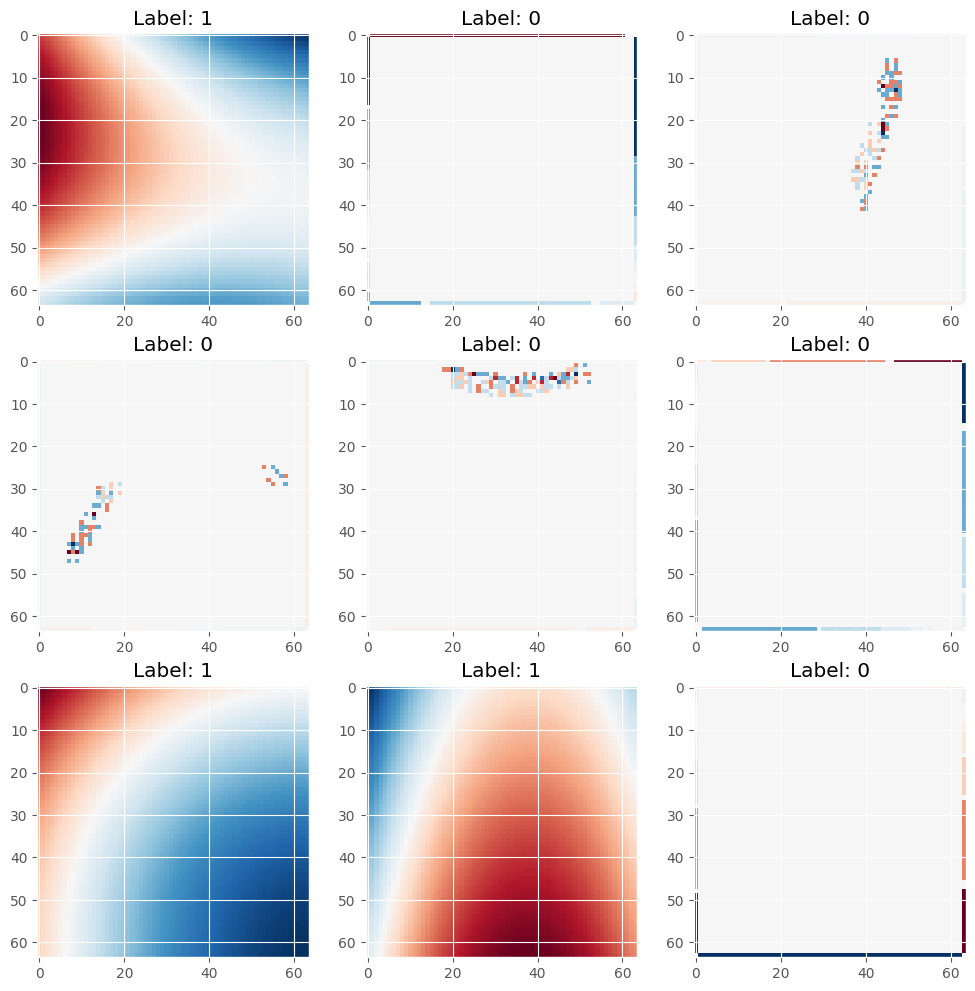

In [14]:
fig, axes = plt.subplots(3,3,figsize=(12,12))

Cs = curl(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
for datum, label, ax in zip(Cs, vis_labels, axes.reshape(-1)):
    ax.imshow(datum[-1,...,0],cmap='RdBu')
    ax.set_title(f'Label: {label}')
    print(datum.mean())
plt.show()
plt.close()